# Capstone Notebook

In [1]:
#imports
import warnings
import pandas as pd
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
#create a list of our classes of images
classes = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Broccoli', 'Cabbage',  'Carrot', 'Cauliflower', 'Cucumber', 'Eggplant', 'Papaya', 'Pepper', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

#create labels for them
class_labels = {name:i for i, name in enumerate(classes)}

num_classes = len(classes)

image_size = (180, 180)


In [3]:
#loading our data

def load():
    directory = 'imgs'
    categories = ['train', 'test']
    
    output = []
    
    for category in categories:
        path = os.path.join(directory, category)
        print(path)
        images = []
        labels = []
        
        for file in os.listdir(path):
            label = class_labels[file]
            
            #iterating through each image
            for image in os.listdir(os.path.join(path, file)):
                
                #get the path name of each image
                image_path = os.path.join(os.path.join(path, file), image)
                
                #open and then resize with our parameter set earlier
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size)
                
                #append labels and images
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
   
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load()

imgs\train
imgs\test


In [5]:
def show_examples(classes, images, labels):
    
    #shuffle our data to show random examples
    images_shuff, labels_shuff = shuffle(images, labels, random_state=49)
    
    #show 5 images from our array with a label
    for i in range(5):
        plt.subplots()
        plt.xticks([])
        plt.yticks([])
        image = cv2.resize(images_shuff[i], (180, 180))
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(classes[labels_shuff[i]])
    plt.show()

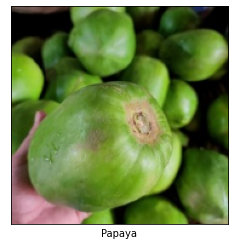

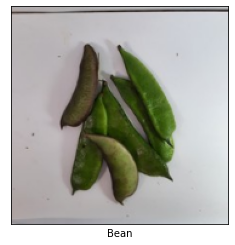

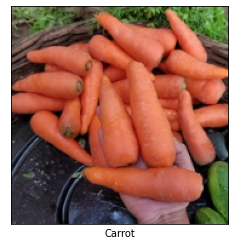

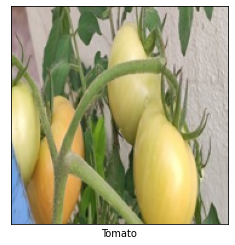

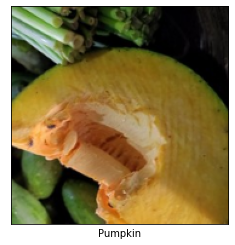

In [6]:
show_examples(classes, train_images, train_labels)

In [7]:
#creating a base model
#the 'layers' of the model can be tweaked and played with to get various results
#these are just random ones i picked to try out first
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu)
])

In [8]:
#compiling our base model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# fitting and running our CNN
model_1_fit = model_1.fit(train_images, train_labels, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 72s 192ms/step - loss: 13.3150 - accuracy: 0.0861 - val_loss: 17.2171 - val_accuracy: 0.0000e+00
Epoch 2/2
375/375 [==============================] - 75s 199ms/step - loss: 13.1859 - accuracy: 0.0833 - val_loss: 17.2171 - val_accuracy: 0.0000e+00


In [10]:
#trying some new layers to see how it changes our accuracy
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.softmax)
])

In [11]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_2_fit = model_2.fit(train_images, train_labels, batch_size=32, epochs=4, validation_split=0.2)

Epoch 1/4
375/375 [==============================] - 108s 287ms/step - loss: 25.7171 - accuracy: 0.5422 - val_loss: 81.0885 - val_accuracy: 0.0000e+00
Epoch 2/4
375/375 [==============================] - 115s 306ms/step - loss: 0.3706 - accuracy: 0.8899 - val_loss: 121.9749 - val_accuracy: 0.0000e+00
Epoch 3/4
375/375 [==============================] - 117s 313ms/step - loss: 0.1544 - accuracy: 0.9567 - val_loss: 111.2155 - val_accuracy: 0.0000e+00
Epoch 4/4
375/375 [==============================] - 116s 308ms/step - loss: 0.0833 - accuracy: 0.9781 - val_loss: 129.0741 - val_accuracy: 0.0000e+00
